In [75]:
#1.Setup Environment
import cv2
import numpy as np

import pylab
!pip install common
!pip -q install pytesseract
!sudo apt install tesseract-ocr libtesseract-dev
import pytesseract
import common
import re
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from pytesseract import Output

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


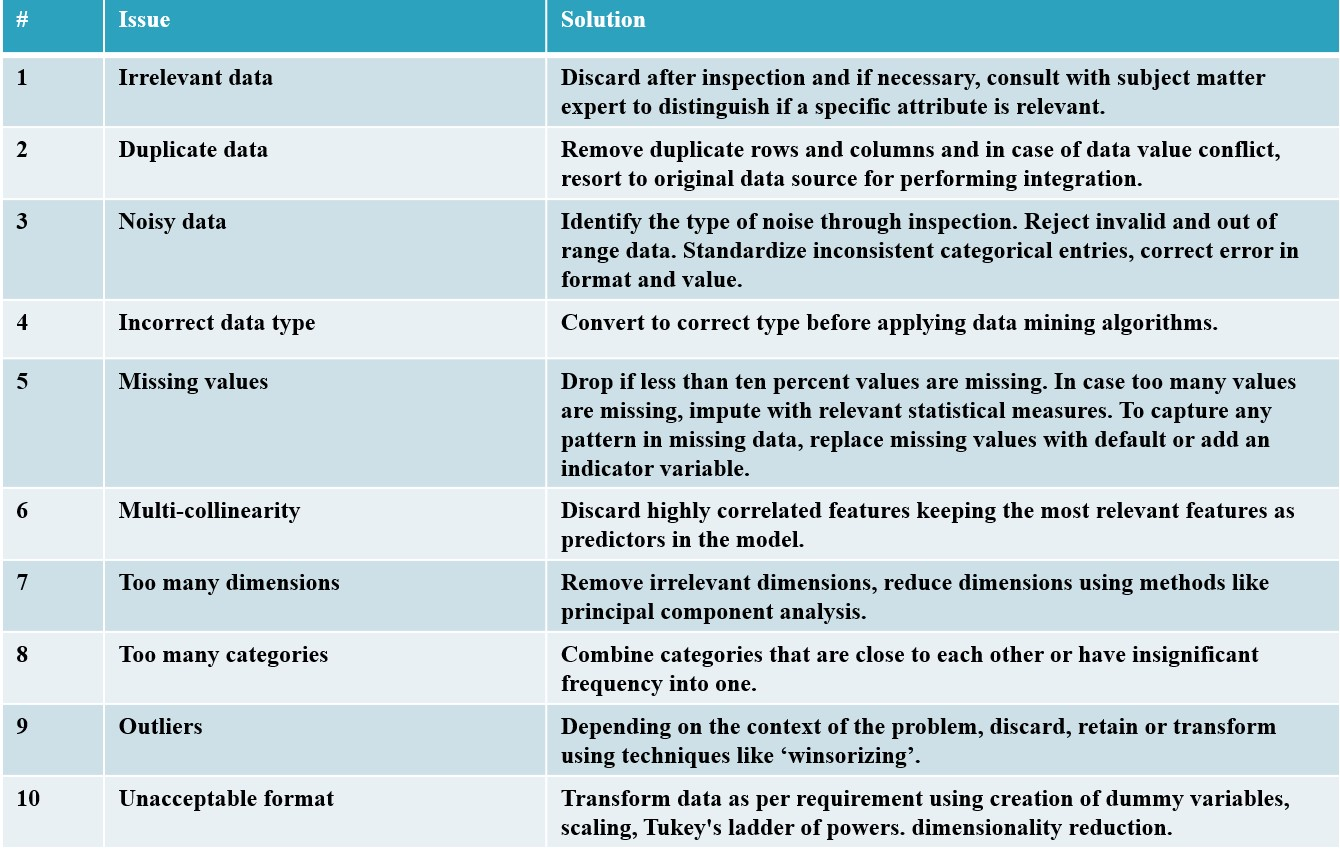

The image size: 3449160
The image shape: (858, 1340, 3)
The image dtype: uint8


In [77]:
#2.Load an image with some basic informations
rowimage = cv2.imread('/content/drive/MyDrive/image/form.jpg')
cv2_imshow(rowimage)
print("The image size:",rowimage.size)
print("The image shape:",rowimage.shape)
print("The image dtype:",rowimage.dtype)

In [78]:
#3.Pre-process the image

#3.1 grayscale the image
def grayscale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#3.2 Thresholding

#200(Threshold values for pixels in image and change them to 255 when it bigger than 200)
#255(maximun values)
#cv2.THRESH_BINARY(binary set: set it to the 0 when it smaller than 200)
def threshold(image):
  return cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)[1]

#3.4 Noise Removal
def noise(image):
  return cv2.medianBlur(image,5)

#3.5 Dilation
def dilation(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.dilate(image, kernel, iterations = 1)

#3.6 Erosion
def erosion(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.erode(image, kernel, iterations = 1)

#3.7 Canny

#Using canny alogrithm for detecting edges.
#100(low threahold, pixels only be considered when its values higher than 100)
#200(high threahold, pixels only be determined as edges when its values higher than 200)
def canny(image):
  return cv2.Canny(image,100,200)



In [79]:
#3.Pre-process the image --continue
gray = grayscale(rowimage)
threshold = threshold(gray)
erosion = erosion(gray)
dilate = dilation(gray)
canny = canny(gray)

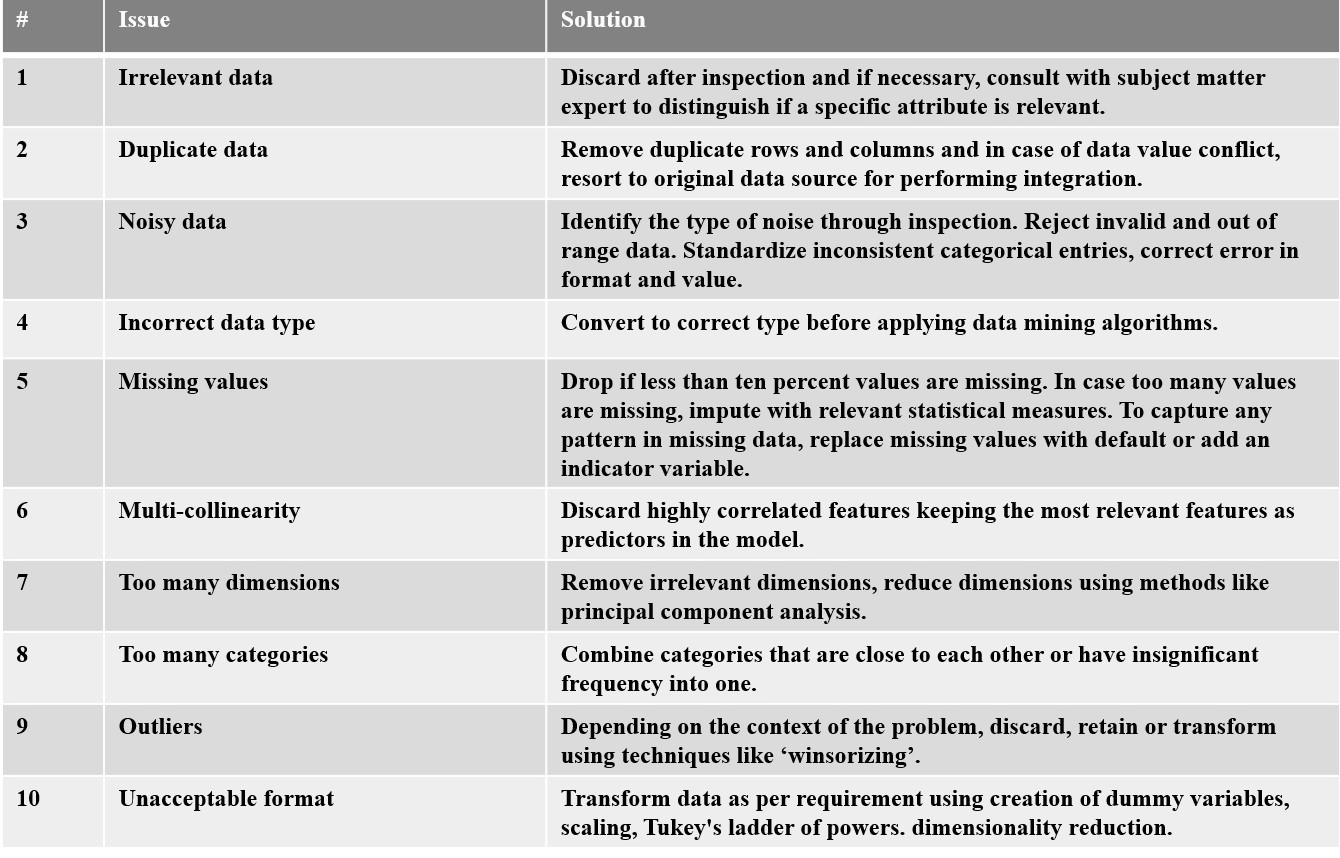

In [80]:
#3.Pre-process the image --continue
cv2_imshow(gray)

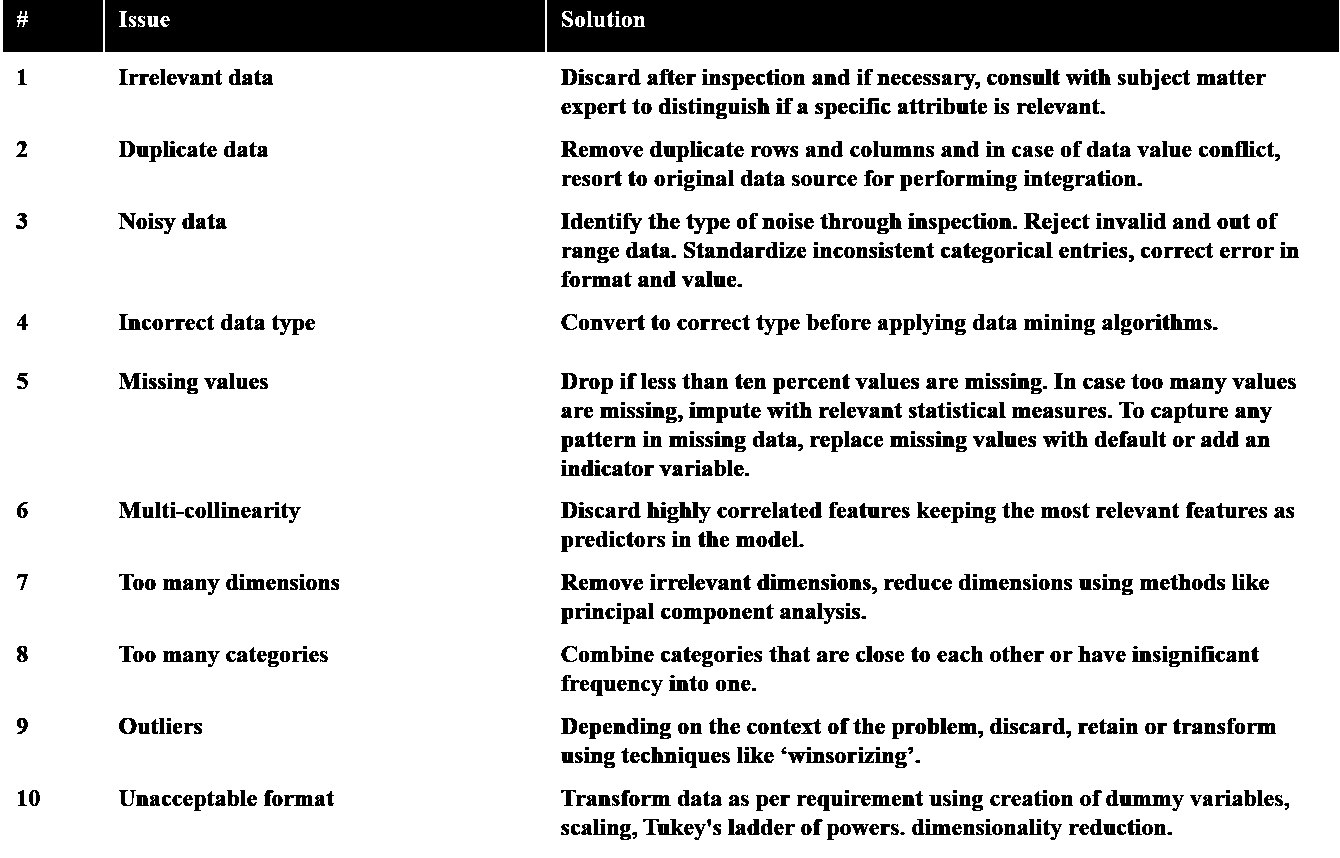

In [81]:
cv2_imshow(threshold)

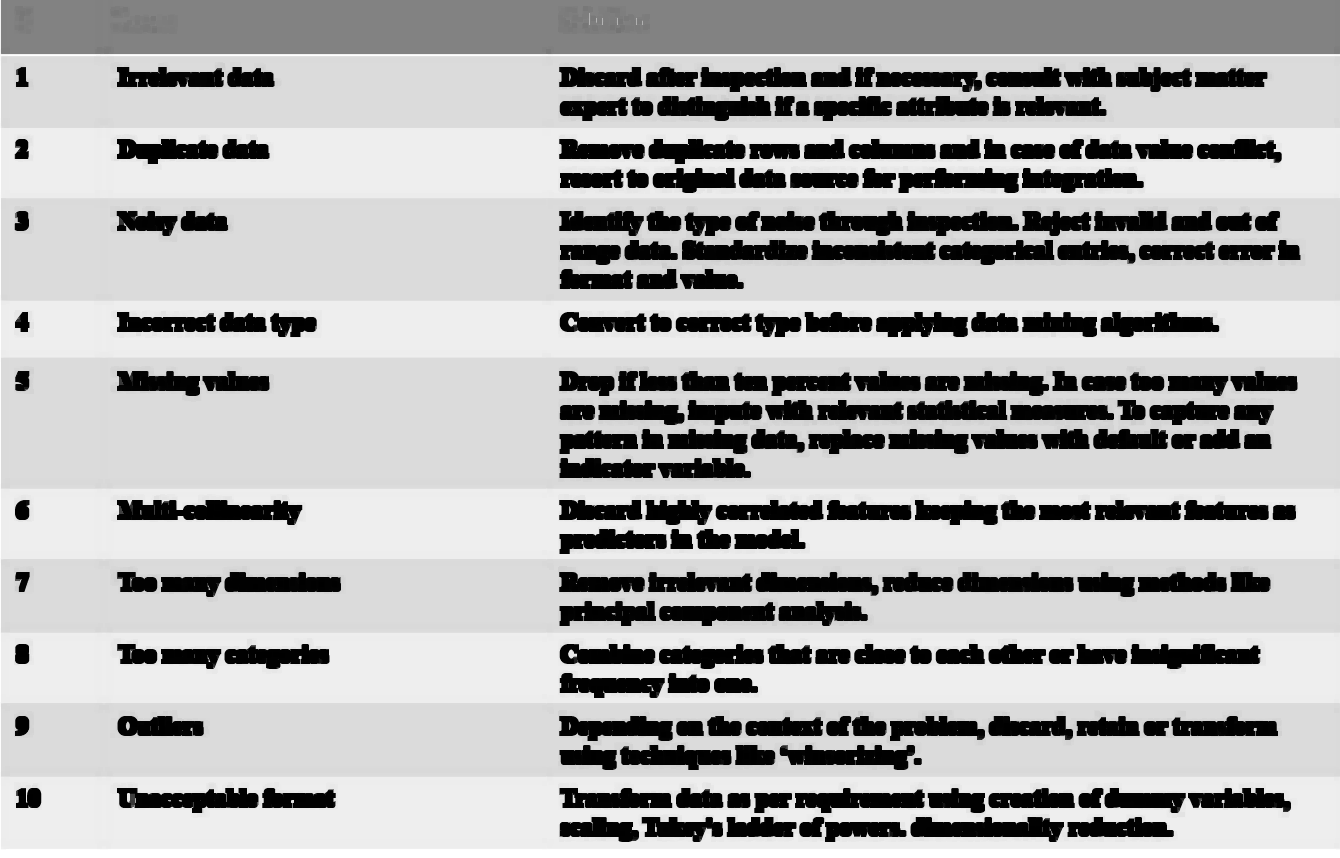

In [82]:
cv2_imshow(erosion)

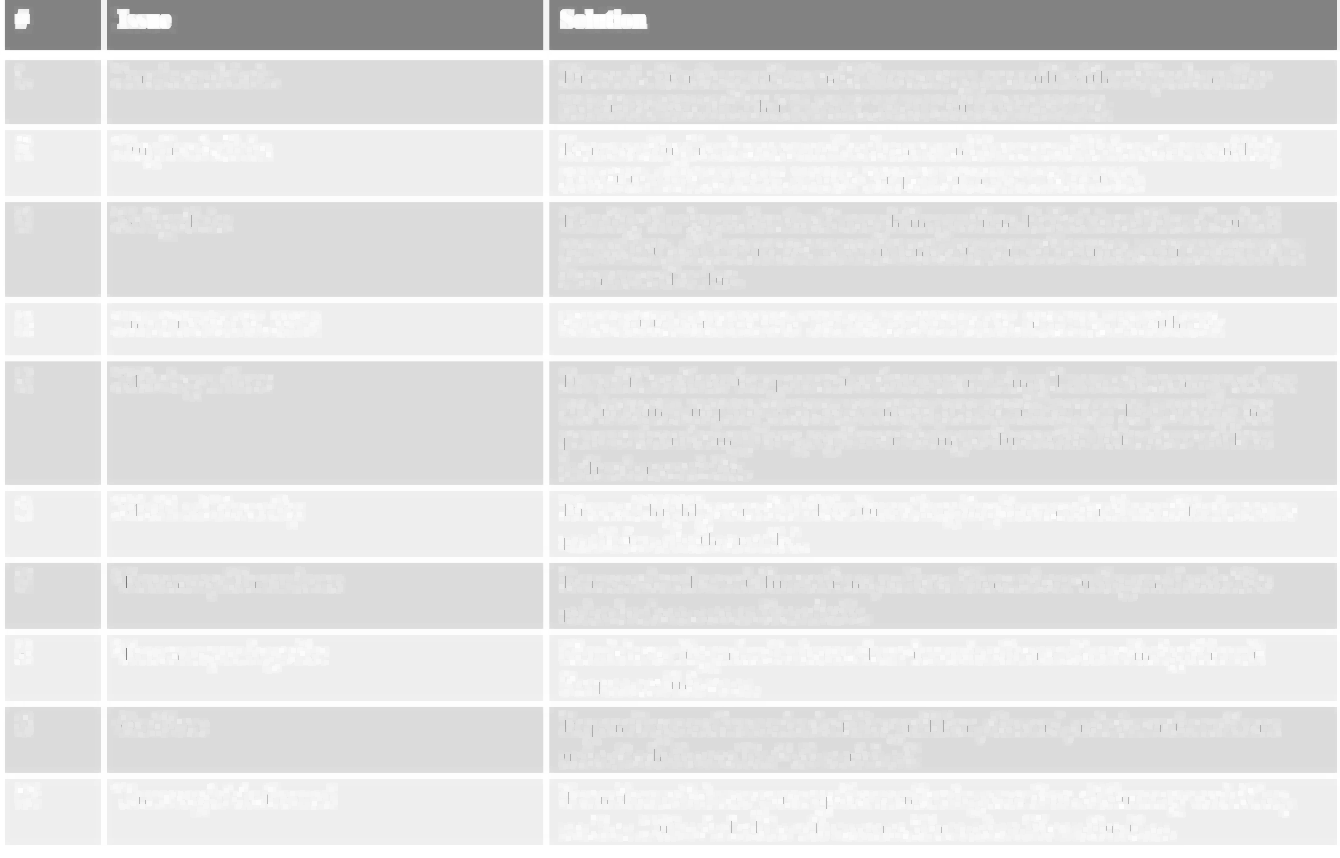

In [83]:
cv2_imshow(dilate)

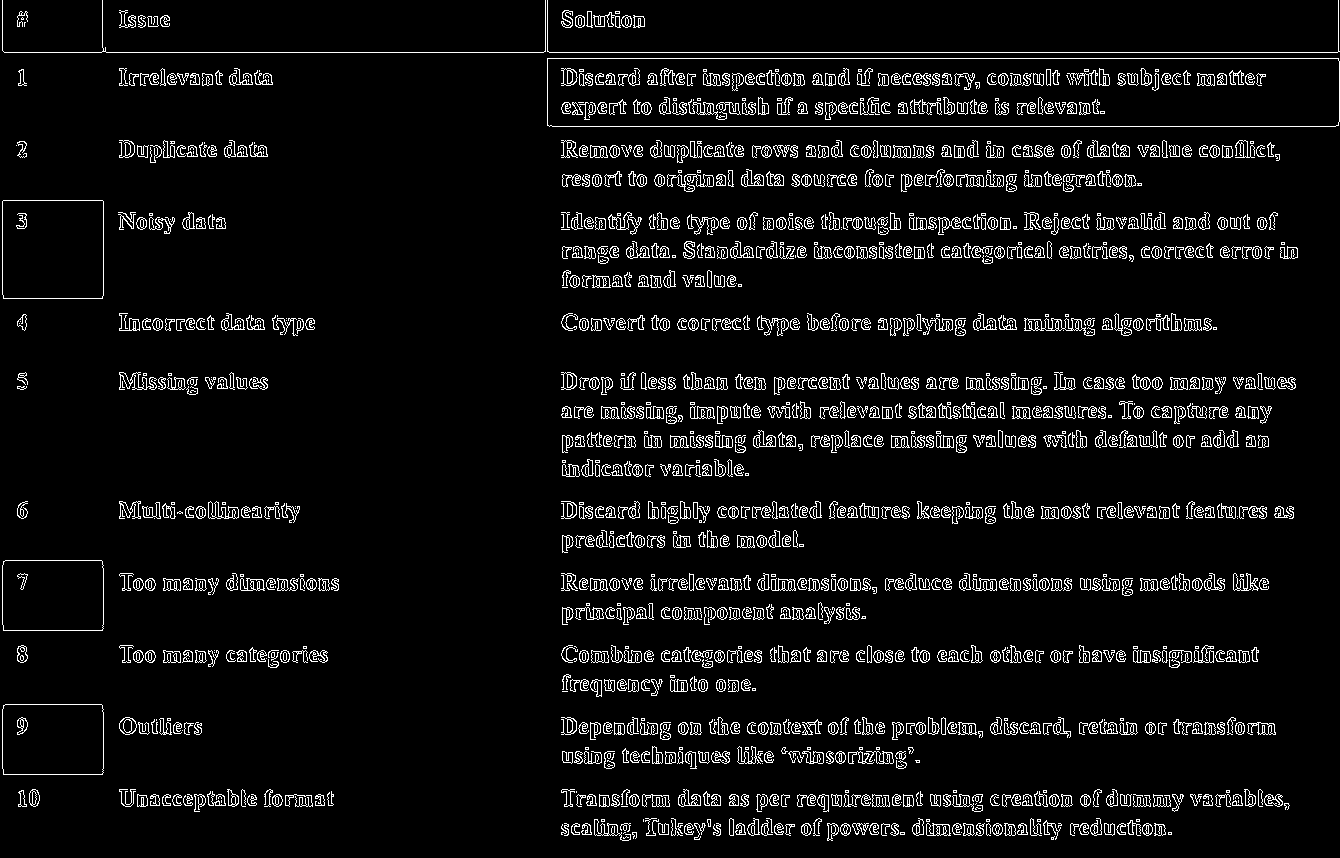

In [84]:
cv2_imshow(canny)

In [85]:
#As the system only keeps about three code blocks after the def function has set up
#Therefore this just repetitive part with def

#3.1 grayscale the image
def grayscale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#3.2 Thresholding

#200(Threshold values for pixels in image and change them to 255 when it bigger than 200)
#255(maximun values)
#cv2.THRESH_BINARY(binary set: set it to the 0 when it smaller than 200)
def threshold(image):
  return cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)[1]

#3.4 Noise Removal
def noise(image):
  return cv2.medianBlur(image,5)

#3.5 Dilation
def dilation(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.dilate(image, kernel, iterations = 1)

#3.6 Erosion
def erosion(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.erode(image, kernel, iterations = 1)

#3.7 Canny

#Using canny alogrithm for detecting edges.
#100(low threahold, pixels only be considered when its values higher than 100)
#200(high threahold, pixels only be determined as edges when its values higher than 200)
def canny(image):
  return cv2.Canny(image,100,200)


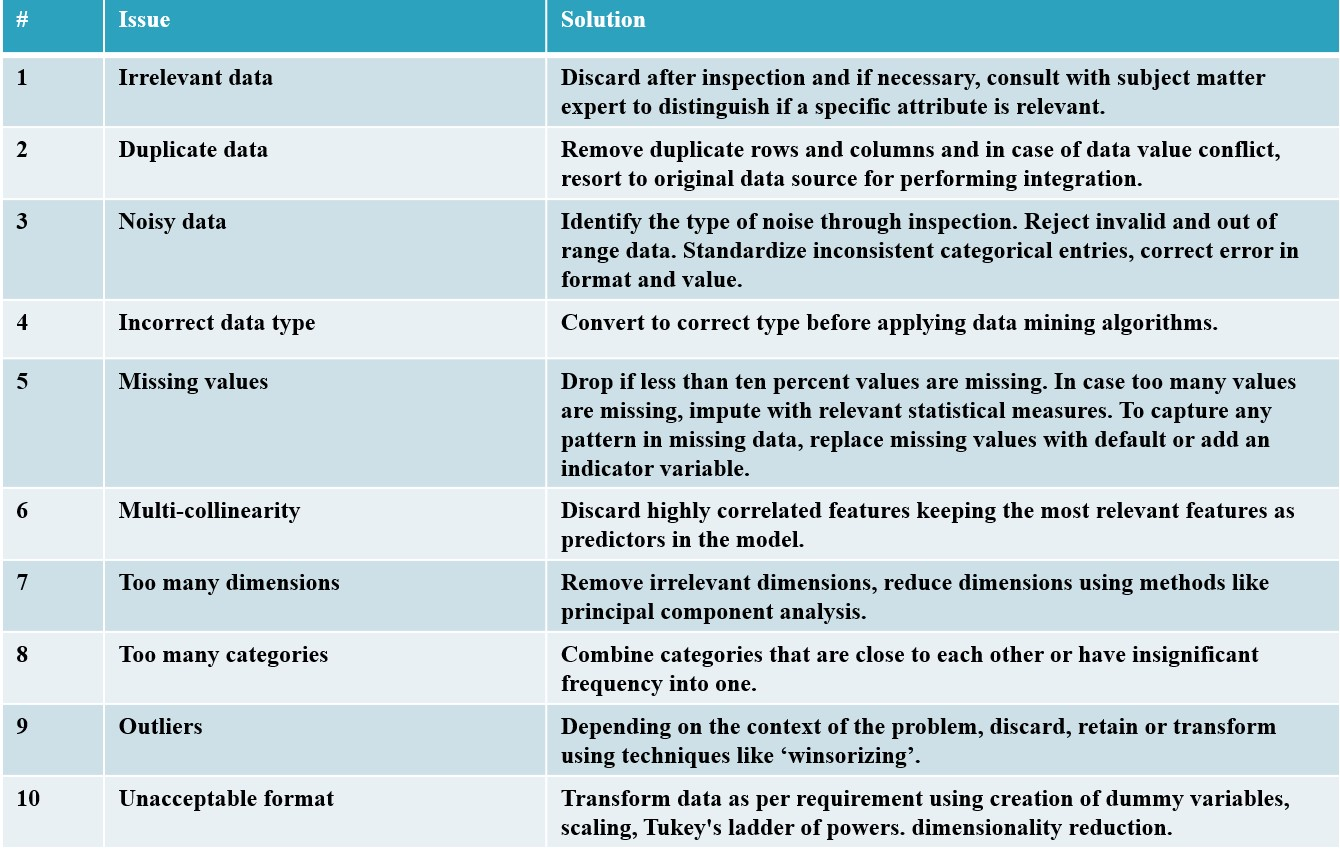

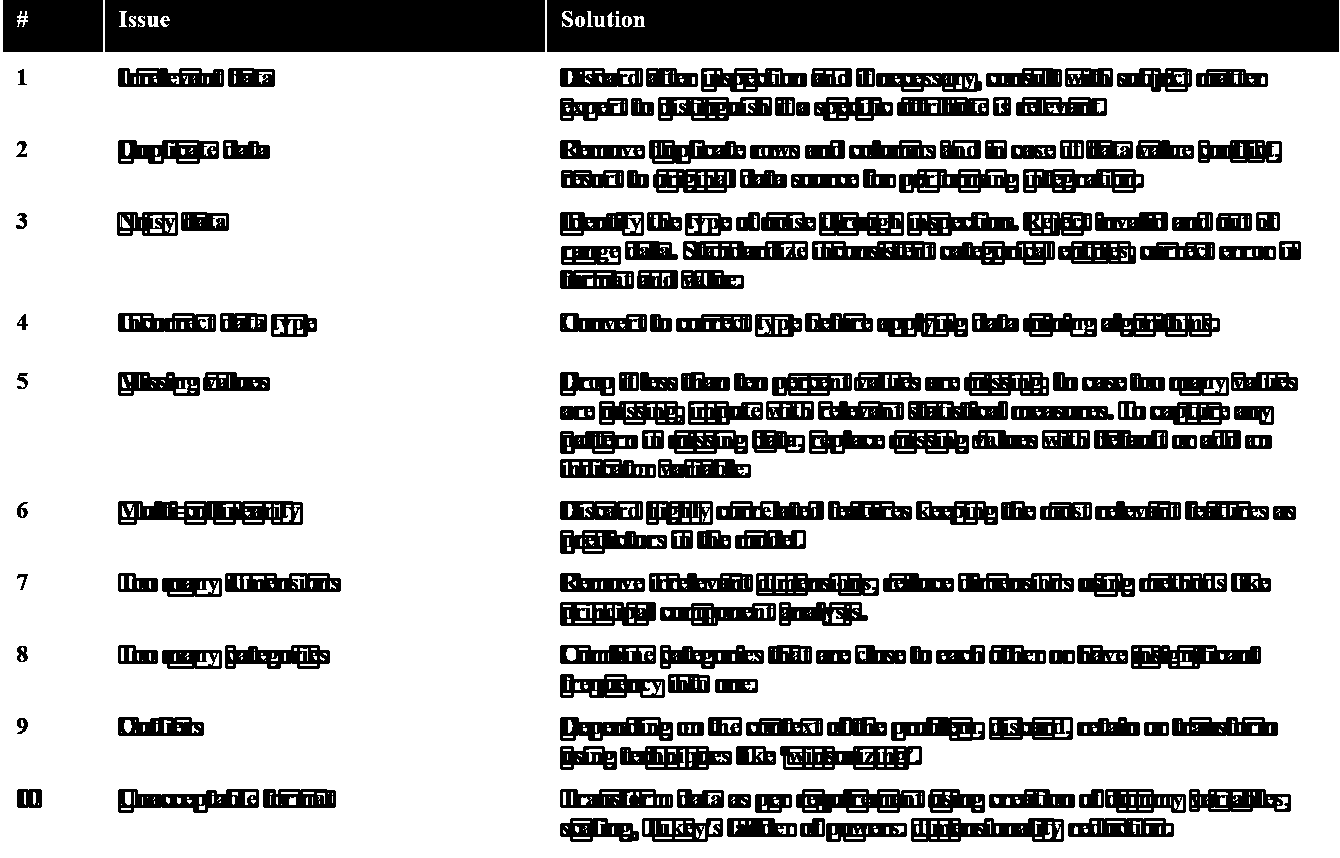

In [86]:


#4.Text Detection
#4.1 Single words dectection

#Because the origin image always be overwritten by processed image after running the following codes
#This part of codes just for restore the original image
rowimage = cv2.imread('/content/drive/MyDrive/image/form.jpg')
cv2_imshow(rowimage)
gray = grayscale(rowimage)
erosion = erosion(gray)
threshold = threshold(gray)

decimg = threshold
h,w,c = rowimage.shape
#Collect the box that wraps the single word
boxes = pytesseract.image_to_boxes(decimg)
for b in boxes.splitlines():
  # lstrip('~'): Remove all the ~ strings started from words
  # strip(): Remove all the blanks strings (including \n, tab ...)
  # split(): split the strings by blank spacing and changed it to arrays
  b = b.lstrip('~').strip().split(' ')
  decimg = cv2.rectangle(decimg, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
  # After changed it to the array, the rectangle will draw a boxes as (b1,h-b2),(b3,h-b4) coordinate
  # this loop ended when all the boxes recorded in b has been well drawn.

cv2_imshow(decimg)



In [87]:
#As the system only keeps about three code blocks after the def function has set up
#Therefore this just repetitive part with def

#3.1 grayscale the image
def grayscale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#3.2 Thresholding

#200(Threshold values for pixels in image and change them to 255 when it bigger than 200)
#255(maximun values)
#cv2.THRESH_BINARY(binary set: set it to the 0 when it smaller than 200)
def threshold(image):
  return cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)[1]

#3.4 Noise Removal
def noise(image):
  return cv2.medianBlur(image,5)

#3.5 Dilation
def dilation(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.dilate(image, kernel, iterations = 1)

#3.6 Erosion
def erosion(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.erode(image, kernel, iterations = 1)

#3.7 Canny

#Using canny alogrithm for detecting edges.
#100(low threahold, pixels only be considered when its values higher than 100)
#200(high threahold, pixels only be determined as edges when its values higher than 200)
def canny(image):
  return cv2.Canny(image,100,200)

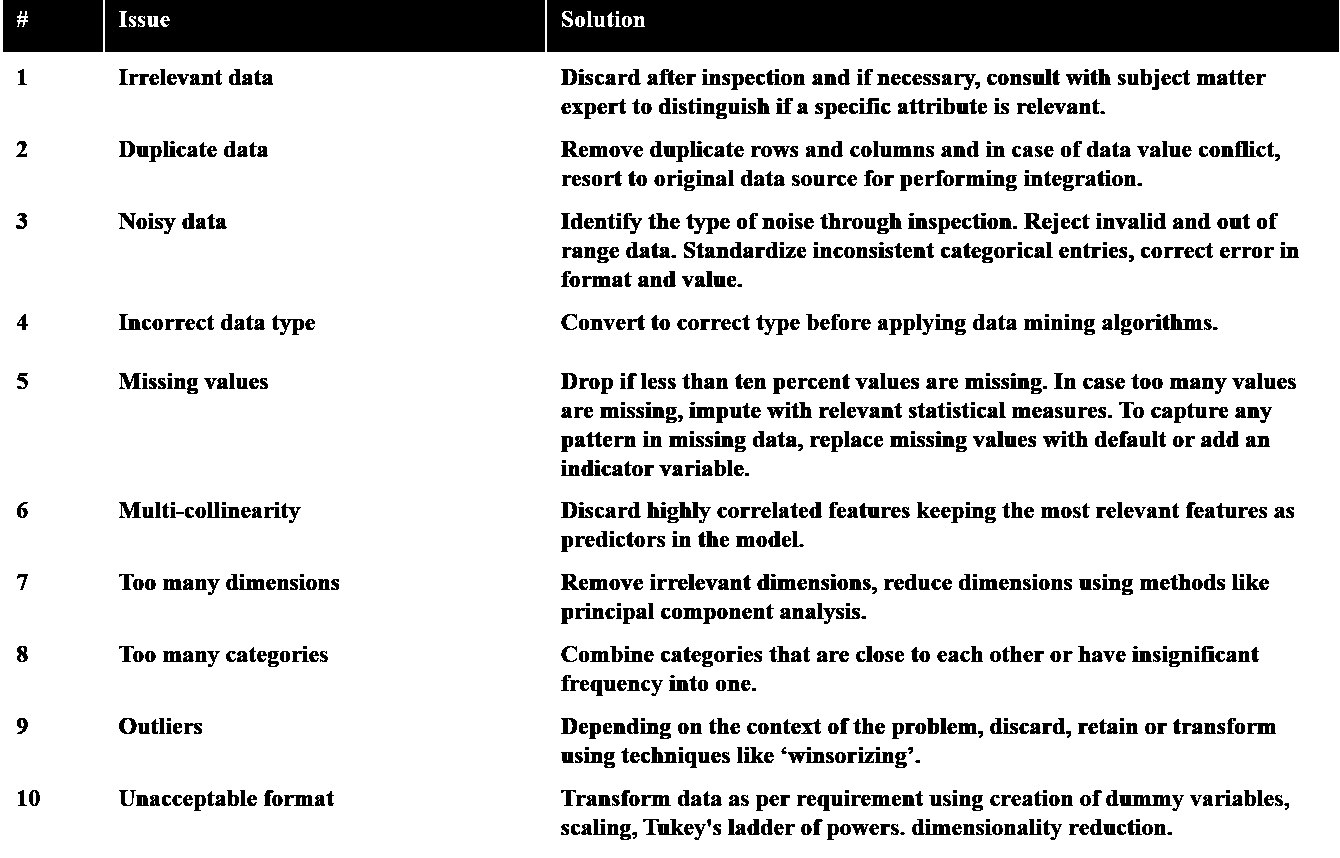

1 Irrelevant data Discard after inspection and if necessary, consult with subject matter
expert to distinguish if a specific attribute is relevant.

2 Duplicate data Remove duplicate rows and columns and in case of data value conflict,
resort to original data source for performing integration.

3 Noisy data Identify the type of noise through inspection. Reject invalid and out of
range data. Standardize inconsistent categorical entries, correct error in
format and value.

4 Incorrect data type Convert to correct type before applying data mining algorithms.

5 Missing values Drop if less than ten percent values are missing. In case too many values
are missing, impute with relevant statistical measures. To capture any
pattern in missing data, replace missing values with default or add an
indicator variable.

6 Multi-collinearity Discard highly correlated features keeping the most relevant features as
predictors in the model.

7 Too many dimensions Remove irrelevant dimensions, reduce dime

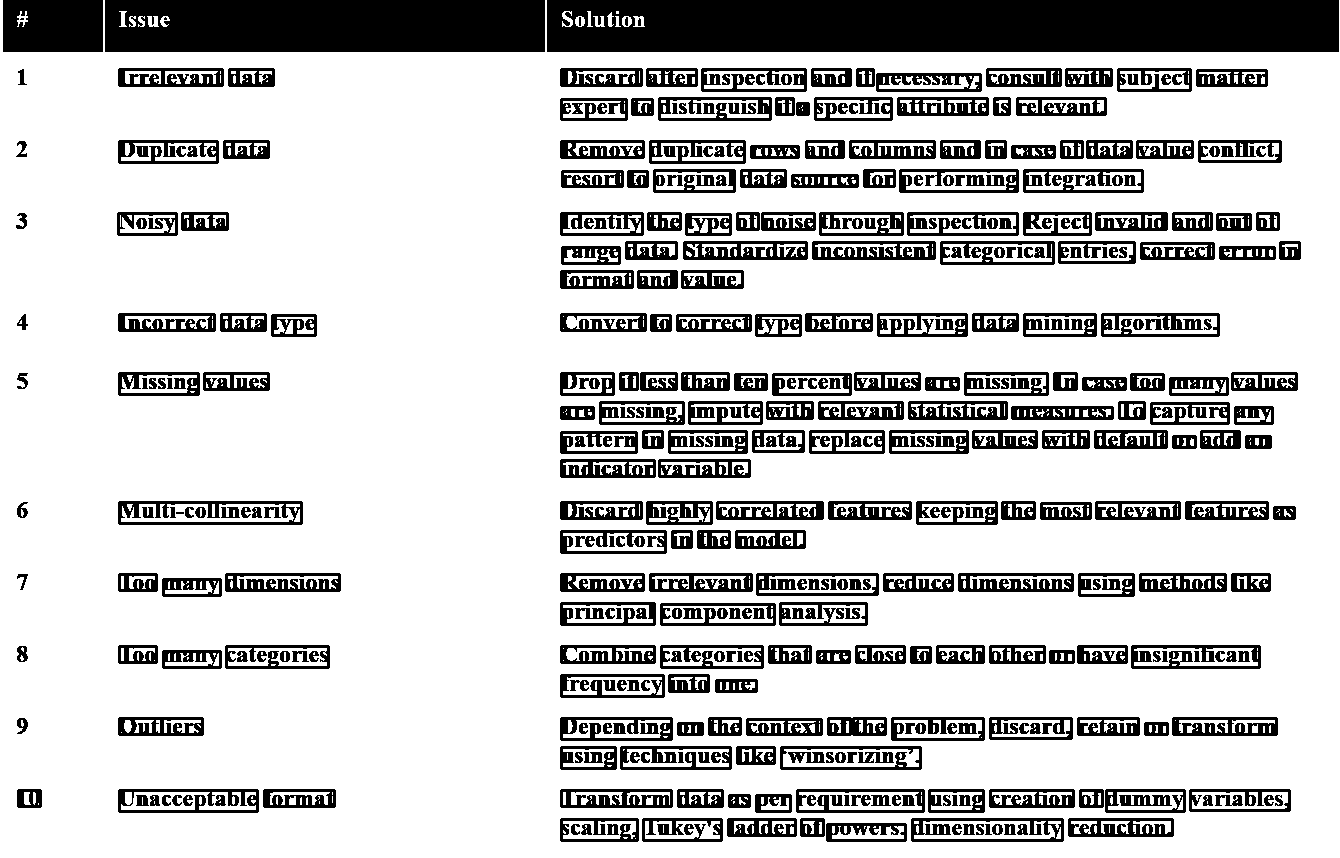

In [88]:
#4.2 Multiple words detection
rowimage = cv2.imread('/content/drive/MyDrive/image/form.jpg')
gray = grayscale(rowimage)
threshold = threshold(gray)
erosion = erosion(gray)
dilation = dilation(gray)
canny = canny(gray)
cv2_imshow(threshold)   #

# --oem 3: Using OCR Engine Mode with Automatic selecting engine mode (3)
# --psm 6: Page Segmentation Mode with assuming input image as the whole textview block (6)
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(threshold, config=custom_config)   #
print(text)

dkey = pytesseract.image_to_data(threshold,output_type=Output.DICT)   #
multimg = threshold   #

#Different from Single word detecting, Multiple words detecting using the 'text' data as standard for drawing the boxes
n_boxes = len(dkey['text'])
for i in range(n_boxes):
  if int(dkey['conf'][i])>60:
    (x,y,w,h) = (dkey['left'][i],dkey['top'][i],dkey['width'][i],dkey['height'][i])
    multimg = cv2.rectangle(multimg,(x,y),(x+w,y+h),(0,255,0),2)

cv2_imshow(multimg)


In [94]:
#As the system only keeps about three code blocks after the def function has set up
#Therefore this just repetitive part with def

#3.1 grayscale the image
def grayscale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#3.2 Thresholding

#200(Threshold values for pixels in image and change them to 255 when it bigger than 200)
#255(maximun values)
#cv2.THRESH_BINARY(binary set: set it to the 0 when it smaller than 200)
def threshold(image):
  return cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)[1]

#3.4 Noise Removal
def noise(image):
  return cv2.medianBlur(image,5)

#3.5 Dilation
def dilation(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.dilate(image, kernel, iterations = 1)

#3.6 Erosion
def erosion(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.erode(image, kernel, iterations = 1)

#3.7 Canny

#Using canny alogrithm for detecting edges.
#100(low threahold, pixels only be considered when its values higher than 100)
#200(high threahold, pixels only be determined as edges when its values higher than 200)
def canny(image):
  return cv2.Canny(image,100,200)

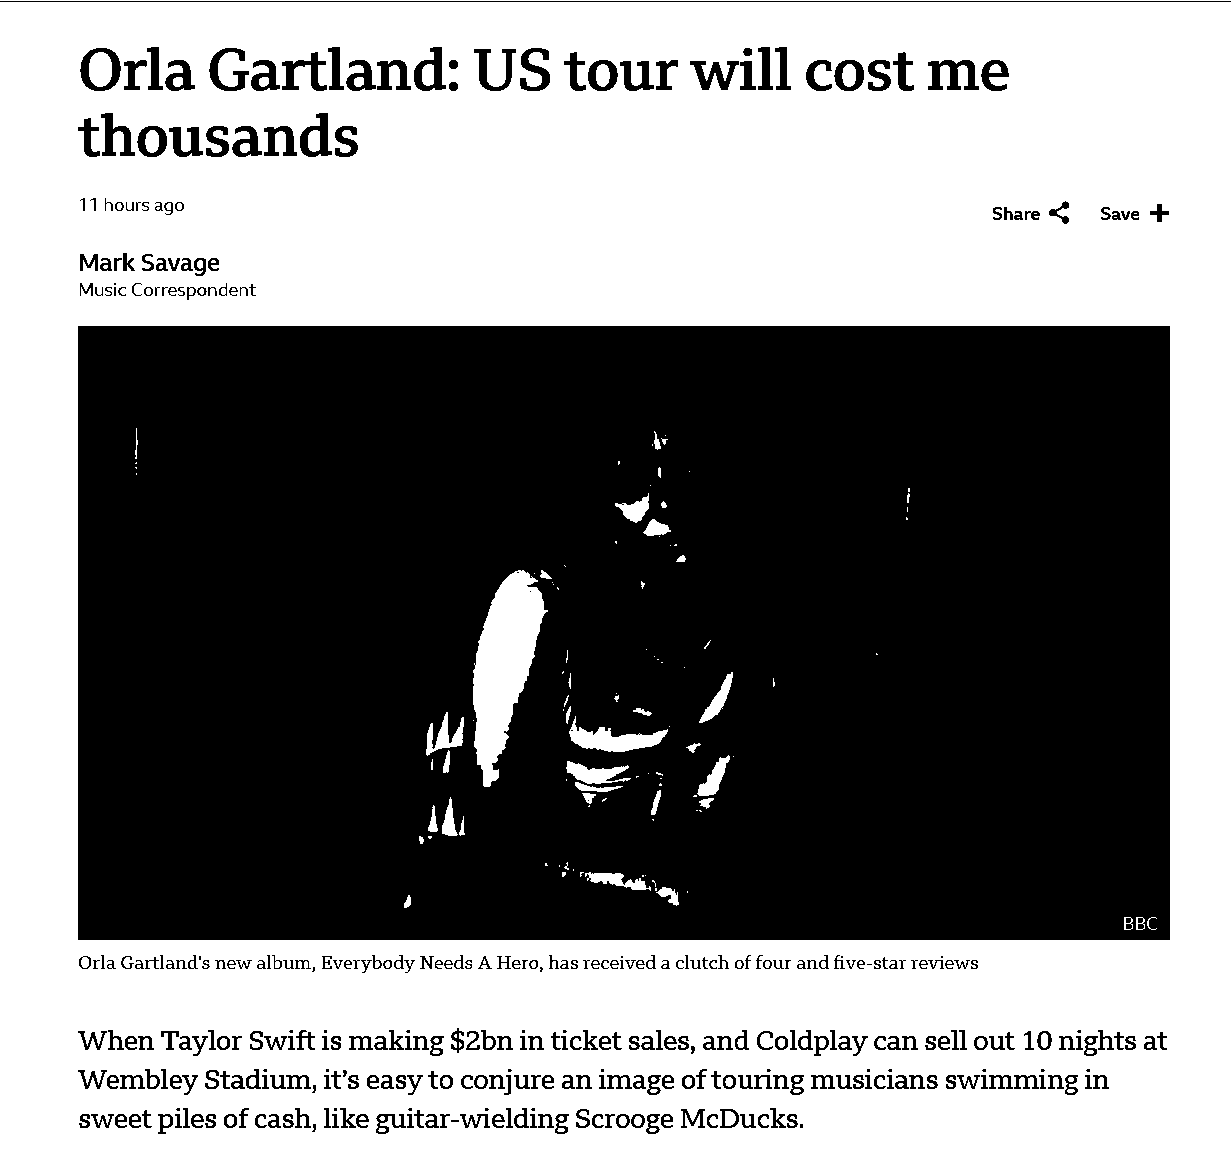

Orla Gartland US tour will cost me
thousands
11 hours ago Share 2 Save
Mark Savage
Music Correspondent
 
i nl
 H
Ve 
x 

f i s

7 J 

 oe

ny re
fo we J
 
di
p in
t 2

Orla Gartlands new album Everybody Needs A Hero has received a clutch of four and fivestar reviews
When Taylor Swift is making 2bn in ticket sales and Coldplay can sell out 10 nights at
Wembley Stadium its easy to conjure an image of touring musicians swimming in
sweet piles of cash like guitarwielding Scrooge McDucks



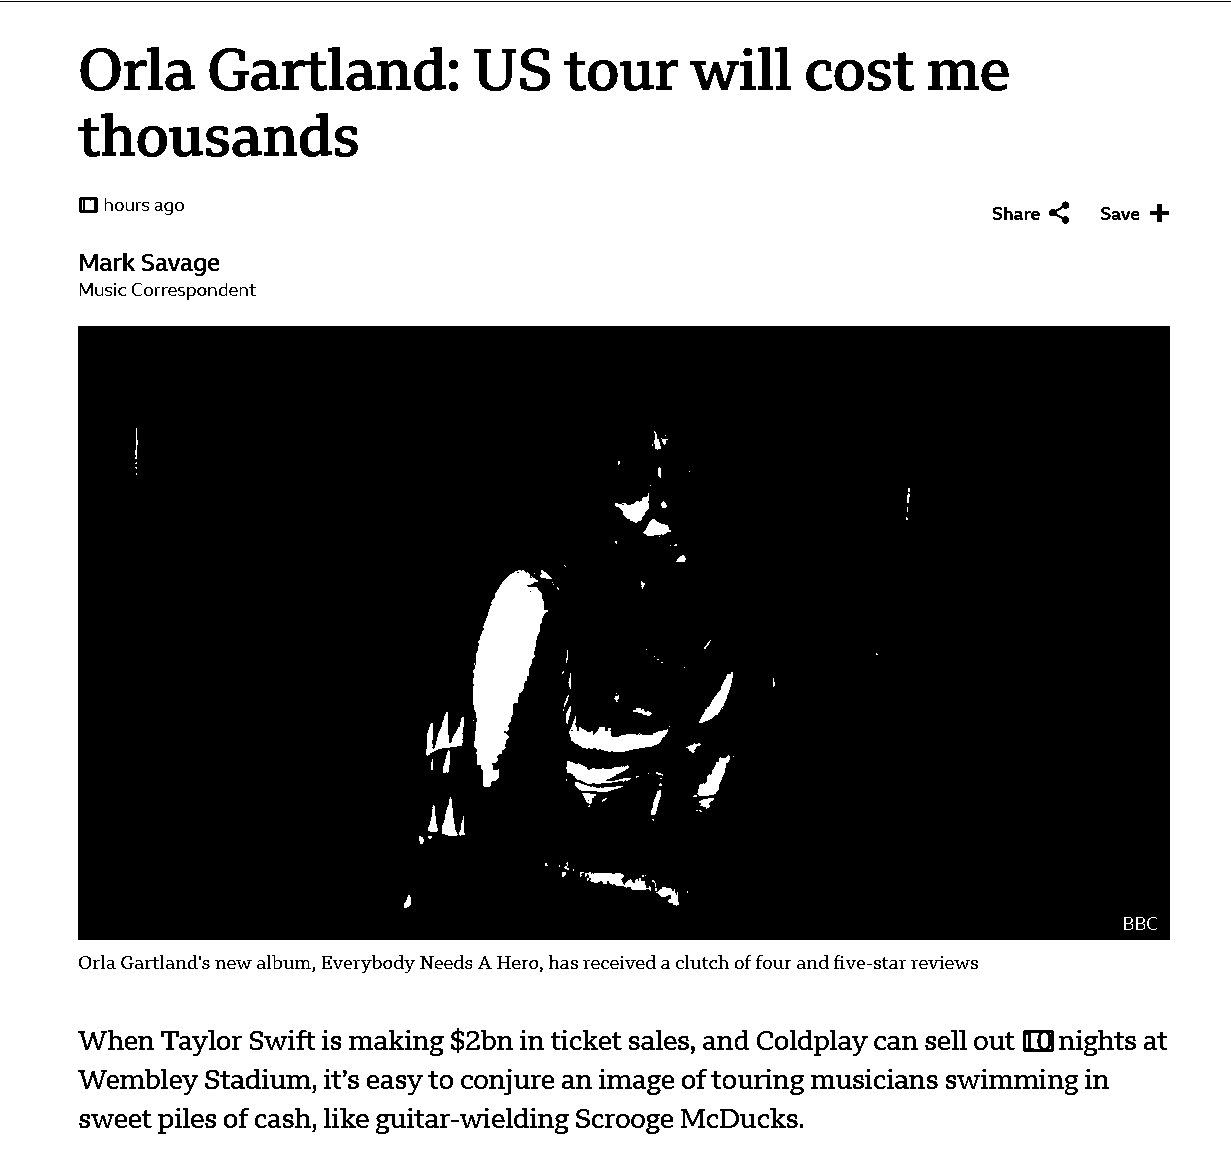

In [95]:
#4.3 Pattern for detecting specific words --- Number
rowimage = cv2.imread('/content/drive/MyDrive/image/newspaper.jpg')
gray = grayscale(rowimage)
threshold = threshold(gray)
cv2_imshow(threshold)

custom_config = r'--oem 3 --psm 6'


text = pytesseract.image_to_string(threshold, config=custom_config)
cleaned_text = re.sub(r'[^a-zA-Z0-9\s]','',text)  #cleaned up some irrelvant words
print(cleaned_text)

patternimg = threshold

dkey = pytesseract.image_to_data(patternimg,lang='eng',output_type=Output.DICT)
keys = list(dkey.keys())
text_pattern = '^\d+$'

#Regular expression:
#Words '^[A-Za-z\s]+$'
#Numbers '^\d+$'

n_boxes = len(dkey['text'])
for i in range(n_boxes):
    if int(dkey['conf'][i])>60:
      if re.match(text_pattern, dkey['text'][i]):
        (x,y,w,h) = (dkey['left'][i],dkey['top'][i],dkey['width'][i],dkey['height'][i])
        parrternimg = cv2.rectangle(patternimg,(x,y),(x+w,y+h),(0,255,0),2)


cv2_imshow(patternimg)

In [91]:
#As the system only keeps about three code blocks after the def function has set up
#Therefore this just repetitive part with def

#3.1 grayscale the image
def grayscale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#3.2 Thresholding

#200(Threshold values for pixels in image and change them to 255 when it bigger than 200)
#255(maximun values)
#cv2.THRESH_BINARY(binary set: set it to the 0 when it smaller than 200)
def threshold(image):
  return cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)[1]

#3.4 Noise Removal
def noise(image):
  return cv2.medianBlur(image,5)

#3.5 Dilation
def dilation(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.dilate(image, kernel, iterations = 1)

#3.6 Erosion
def erosion(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.erode(image, kernel, iterations = 1)

#3.7 Canny

#Using canny alogrithm for detecting edges.
#100(low threahold, pixels only be considered when its values higher than 100)
#200(high threahold, pixels only be determined as edges when its values higher than 200)
def canny(image):
  return cv2.Canny(image,100,200)

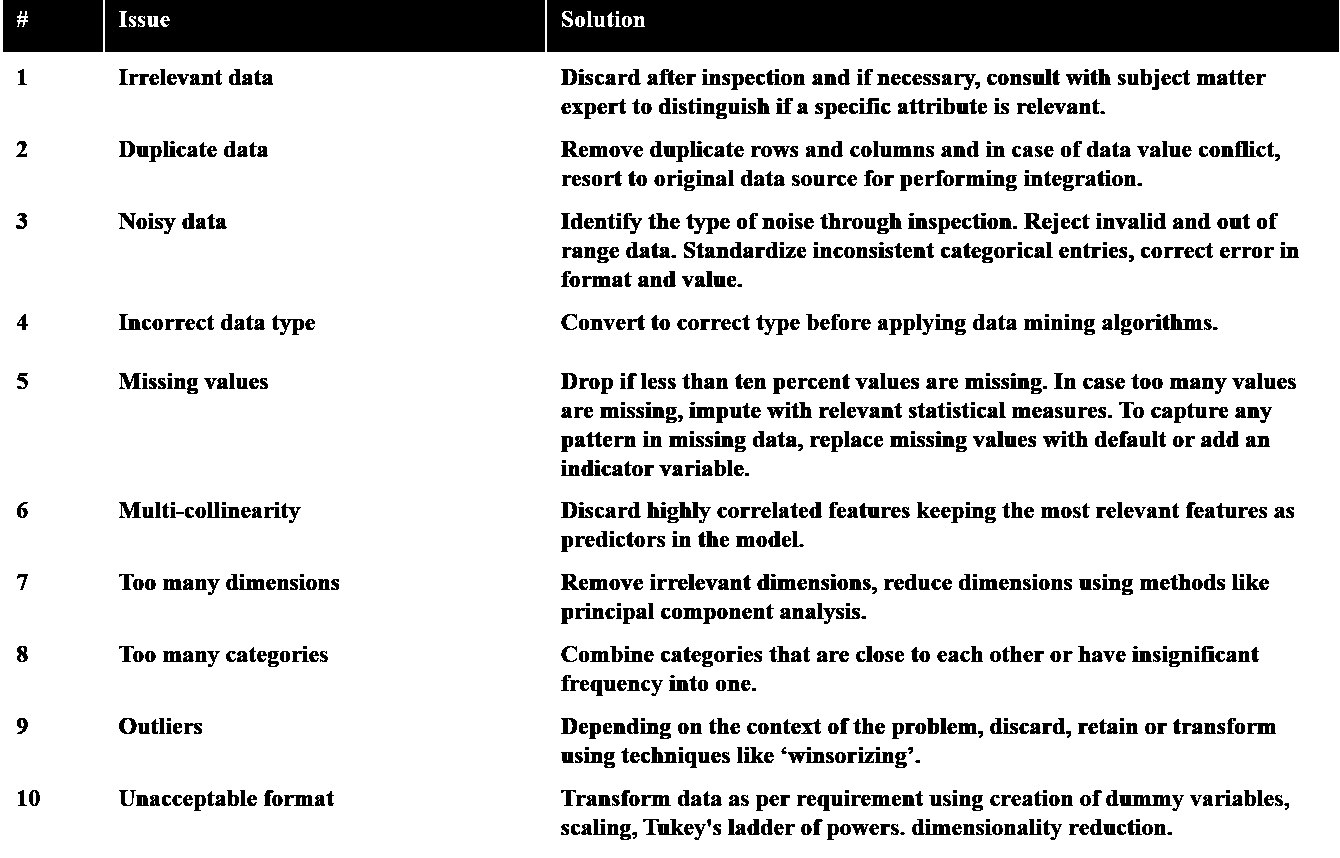

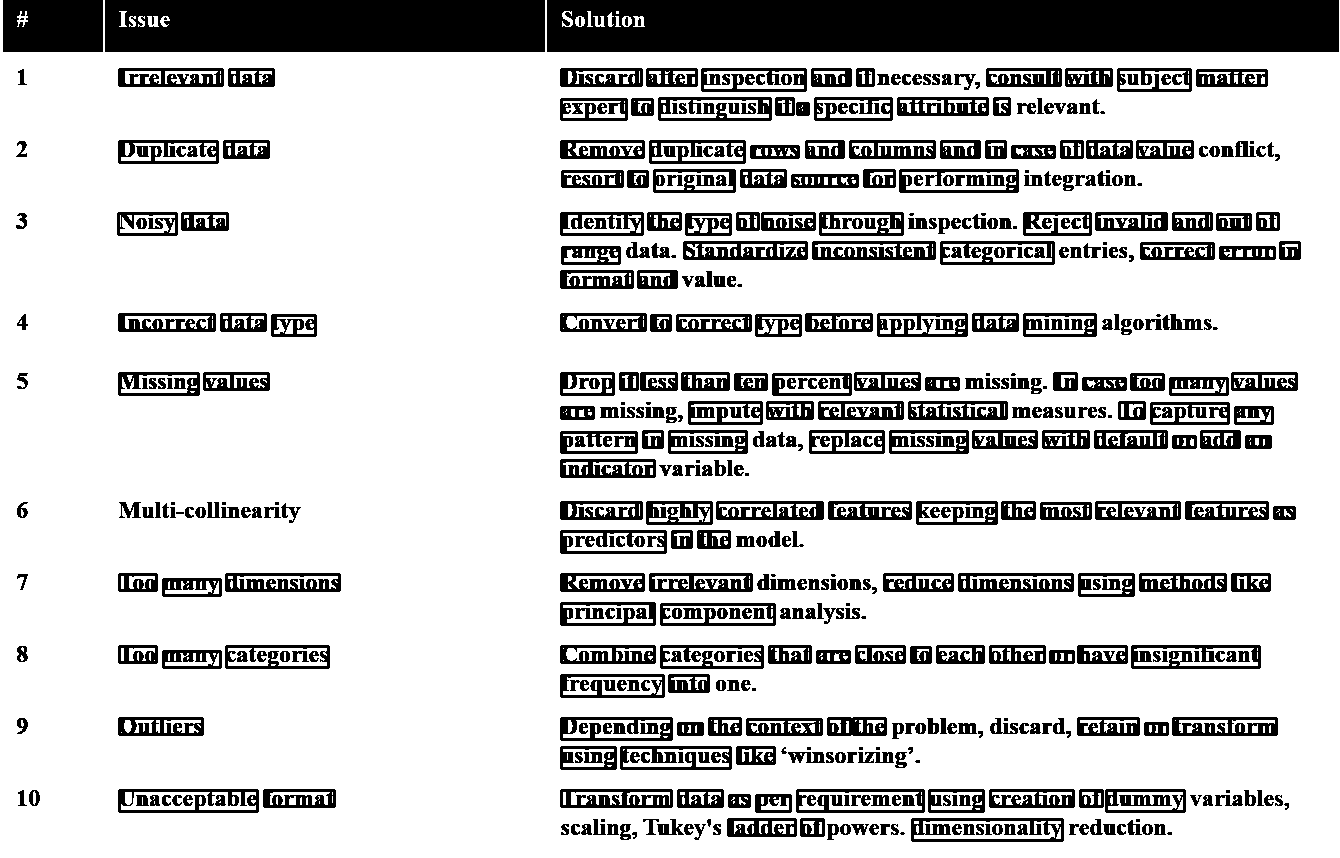

In [92]:
#Pattern for detecting specific words -- Words


rowimage = cv2.imread('/content/drive/MyDrive/image/form.jpg')
gray = grayscale(rowimage)
threshold = threshold(gray)
cv2_imshow(threshold)

patternimg = threshold

dkey = pytesseract.image_to_data(patternimg,lang='eng',output_type=Output.DICT)
keys = list(dkey.keys())
text_pattern = '^[A-Za-z\s]+$'

#Regular expression:
#Words '^[A-Za-z\s]+$'
#Numbers '^\d+$'

n_boxes = len(dkey['text'])
for i in range(n_boxes):
    if int(dkey['conf'][i])>60:
      if re.match(text_pattern, dkey['text'][i]):
        (x,y,w,h) = (dkey['left'][i],dkey['top'][i],dkey['width'][i],dkey['height'][i])
        parrternimg = cv2.rectangle(patternimg,(x,y),(x+w,y+h),(0,255,0),2)


cv2_imshow(patternimg)


